# Import libraries

In [156]:
# ! pip install faker 

In [157]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider

In [158]:
fake = Faker()
start_date = datetime.strptime("2005-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

In [159]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [160]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [161]:
city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [162]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)

cam_phone_number = fake.phone_number()
print(cam_phone_number)

+237 650683628


In [210]:
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = cam_phone_number
    registration_date = fake.date_between(start_date, end_date)
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()
    # city = random.choice(list(cameroon_cities.city))

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        # 'city': city,
        # 'region' : cameroon_cities[cameroon_cities.city == city].admin_name
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:15<00:00, 639.20it/s]

(10000, 8)


In [227]:
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [228]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


C:\Users\herma\AppData\Local\Temp\ipykernel_13280\1662428224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
C:\Users\herma\AppData\Local\Temp\ipykernel_13280\1662428224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,e9edcf2833a74ae7b7e951e8a934c6f9,Thomas,George,Thomas.George@green.com,+237 650683628,2009-04-23,1976-03-10,"21652 Snyder Path Apt. 141\nJustinview, MA 13027",Bafoussam,Ouest
1,5308eacd653f444f9f4672d0f0e8b68a,Brandi,Perkins,Brandi.Perkins@smith.org,+237 650683628,2016-03-12,1973-11-06,"880 Harris Cliffs Apt. 658\nRaymondshire, MH 8...",Yaoundé,Centre
2,f14825a8d20c41fa8947aa0fb7b159d6,Rachel,Whitehead,Rachel.Whitehead@moore.org,+237 650683628,2022-05-25,1991-07-16,"94220 Shepard Neck\nCarmenburgh, NJ 39317",Yaoundé,Centre
3,66daeda435fe4d769b2caf417d3ef746,Jennifer,Stokes,Jennifer.Stokes@raymond.info,+237 650683628,2007-12-09,1955-09-05,0415 Christopher Junctions Apt. 812\nColemanst...,Garoua,Nord
4,b39bc748fc244e769e5745ec4b4c5d21,James,Watson,James.Watson@cervantes.org,+237 650683628,2007-04-23,1979-12-25,"9984 Cindy Cliffs Apt. 281\nNew Joseph, NE 06231",Garoua,Nord


In [229]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,e1e13826d32a44dca7c497e1b883fd6b,Chelsey,Boone,Chelsey.Boone@delgado-neal.com,+237 650683628,2014-02-19,1982-02-21,Unit 8865 Box 7281\nDPO AP 37645,Douala,Littoral
1,659a33b3426743699c7a1615ba21f286,Julia,Reynolds,Julia.Reynolds@watson.com,+237 650683628,2020-05-10,1955-03-07,"120 Wilson Creek\nNorth Heidi, KS 21482",Douala,Littoral
2,f15d76eebe1c4469a3f524d834d10eb8,Kristin,Keller,Kristin.Keller@wright.biz,+237 650683628,2014-03-17,1952-09-11,"84867 Joseph Lakes\nNew Wesley, VT 02237",Yaoundé,Centre
3,9a81f1738a0e4124a5040e3fbc2985b7,Jeffrey,Welch,Jeffrey.Welch@flowers-anderson.com,+237 650683628,2007-06-03,1976-04-06,8624 Farmer Knolls Suite 181\nEast Kimberlyfur...,Yaoundé,Centre
4,4e6dccbdf64d443cbf13344407629f04,Kimberly,Castro,Kimberly.Castro@miller-mccann.com,+237 650683628,2006-11-19,1962-03-09,"861 Perry Plain\nGarciastad, TN 22824",Bafoussam,Ouest


In [230]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,9c8fe61944b34cf09d8d00c49c06134f,Judith,Brown,Judith.Brown@hooper.org,+237 650683628,2011-01-10,1952-02-04,"20866 Welch Trail\nMartinezville, OR 51372",Bamessi,North-West
1,5981a6d3cc4c439d9d175f97ef399acb,Robert,Figueroa,Robert.Figueroa@potts-taylor.info,+237 650683628,2009-02-16,1987-04-24,40095 Destiny Prairie Apt. 525\nNorth Timothyb...,Kontcha,Adamaoua
2,b46426c528d848659a46e52510e66034,Brian,Matthews,Brian.Matthews@kim.biz,+237 650683628,2019-10-17,1965-04-18,"414 Lewis Meadows\nCunninghamburgh, RI 67810",Mbanga,Littoral
3,2b3ab78a23df4b06a1e61273eac811ec,Tammy,Jones,Tammy.Jones@leon-gutierrez.com,+237 650683628,2021-05-09,1981-08-12,13463 Ramirez Village Suite 933\nSouth Johnath...,Mfou,Centre
4,e7d1397b70644fe9939319d148ea14a7,Philip,Vang,Philip.Vang@pitts.com,+237 650683628,2014-09-05,1963-06-25,"2139 Hicks Mission\nKristinaville, VT 75193",Yaoundé,Centre


In [231]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,e9edcf2833a74ae7b7e951e8a934c6f9,Thomas,George,Thomas.George@green.com,+237 650683628,2009-04-23,1976-03-10,"21652 Snyder Path Apt. 141\nJustinview, MA 13027",Bafoussam,Ouest
1,5308eacd653f444f9f4672d0f0e8b68a,Brandi,Perkins,Brandi.Perkins@smith.org,+237 650683628,2016-03-12,1973-11-06,"880 Harris Cliffs Apt. 658\nRaymondshire, MH 8...",Yaoundé,Centre
2,f14825a8d20c41fa8947aa0fb7b159d6,Rachel,Whitehead,Rachel.Whitehead@moore.org,+237 650683628,2022-05-25,1991-07-16,"94220 Shepard Neck\nCarmenburgh, NJ 39317",Yaoundé,Centre
3,66daeda435fe4d769b2caf417d3ef746,Jennifer,Stokes,Jennifer.Stokes@raymond.info,+237 650683628,2007-12-09,1955-09-05,0415 Christopher Junctions Apt. 812\nColemanst...,Garoua,Nord
4,b39bc748fc244e769e5745ec4b4c5d21,James,Watson,James.Watson@cervantes.org,+237 650683628,2007-04-23,1979-12-25,"9984 Cindy Cliffs Apt. 281\nNew Joseph, NE 06231",Garoua,Nord


In [232]:
customer_df_final.isna().sum()

customer_id          0
first_name           0
last_name            0
email                0
phone_number         0
registration_date    0
date_of_birth        0
address              0
city                 0
region               0
dtype: int64

In [233]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [170]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:04<00:00, 21065.16it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,bc4b1e64-e9dd-471f-a20c-808b5519a480,tablette,android,dell,INSPIRON 15,2023-11-29 16:42:19
1,73ee9d8e-096a-46c6-af45-fbb8ae909316,tablette,mac,dell,PRECISION 5550,2023-07-28 04:56:21
2,263cecfa-5262-466e-953c-abbceee181a1,mobile,android,LG,envy45,2024-04-05 12:40:48
3,324f718b-068c-4de3-969d-ea9574d93313,tablette,ios,dell,XPS 13,2019-10-22 03:46:08
4,858e650e-2bf2-44f0-94ff-963992fa3318,mobile,android,Apple,ipad pro,2023-06-30 21:19:17
...,...,...,...,...,...,...
99995,621beaf0-9cf8-4868-84d0-0fb119fd44d1,mobile,linux,LG,spectre x3670,2021-10-26 06:13:04
99996,ddffc4e6-70ef-41d4-9700-2aea88d1bc92,tablette,windows,Apple,ipad pro,2023-01-29 14:23:30
99997,f73801e9-af68-4801-871c-6d6df90a6f28,mobile,windows,HP,envy 13,2020-12-12 05:45:54
99998,bcf13caf-5340-44af-8a82-e1db06e639f6,tablette,linux,SONY,VAIO SX14,2019-10-29 07:29:25


In [171]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [277]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(transaction_type, amount, status):
    if status == "échouée":
        return 1
    elif (amount >= 9500000 and transaction_type in ["depôt", "transfert"]) or (amount >= 10000000 and transaction_type == "retrait"):
        return 1
    else:
        return 0

for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choice(["retrait", "depôt", "transfert"])
    amount = uniform(100, 10000000)
    transaction_date = fake.date_between(start_date, end_date)
    #location = random.choice(location_list)
    device_id = random.choice(devices["device_id"])
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_type": transaction_type,
        "amount": amount,
        "transaction_date": transaction_date,
        #"location": location,
        "status": status,
        "is_fraud": is_fraud_trans(transaction_type, amount, status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

100%|██████████| 100000/100000 [00:14<00:00, 7125.22it/s]


(100000, 8)


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud
0,ffa0b785ffb841dfbd301b6495d36d9c,79874fdbd4df40639c49e5e861b6503f,e9acf9ac-9766-4f87-a047-36720ed6b47d,retrait,9.262086e+06,2007-09-03,réussie,0
1,dfb53934eecc4fb8a127d52e87a546a1,b0e11b1f595347eaac8b7e37d9dd6935,f007c523-8387-42ab-a43d-42236d4905a4,retrait,2.605872e+06,2023-12-04,réussie,0
2,c29e1f3978b6455b80466b88bc18b671,7a781b0027c641abb4470b351673be0e,1bf5b4d6-bbde-480e-aea5-7f807748e1b8,retrait,8.522360e+05,2019-12-05,échouée,1
3,c640af58a12c47e4a1d3844ba276e3f5,e906c71a42914f5dabf4afd500997db8,71473e7b-a171-4db1-8780-b5347b88edb4,retrait,6.606921e+06,2013-03-06,réussie,0
4,236984c2a8ff4ce287c83bc19c4a3d3a,e4e570f750cb4a5f9b184224b78df59b,4fdc7f6c-147e-41e0-b70c-a96620434034,transfert,6.843379e+06,2008-10-17,réussie,0


In [279]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [280]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



C:\Users\herma\AppData\Local\Temp\ipykernel_13280\3274017810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_1[["location"]] = pd.DataFrame(location_1_list)


In [281]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [282]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [283]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.shape 

(100000, 9)

In [284]:
transaction_df_final.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [285]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
        change +=1
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:20, 4855.77it/s]


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
0,ffa0b785ffb841dfbd301b6495d36d9c,79874fdbd4df40639c49e5e861b6503f,e9acf9ac-9766-4f87-a047-36720ed6b47d,retrait,9.262086e+06,2007-09-03,réussie,0,Yaoundé
1,dfb53934eecc4fb8a127d52e87a546a1,b0e11b1f595347eaac8b7e37d9dd6935,f007c523-8387-42ab-a43d-42236d4905a4,retrait,2.605872e+06,2023-12-04,réussie,0,Bafoussam
2,c29e1f3978b6455b80466b88bc18b671,7a781b0027c641abb4470b351673be0e,1bf5b4d6-bbde-480e-aea5-7f807748e1b8,retrait,8.522360e+05,2019-12-05,échouée,1,Bamenda
3,c640af58a12c47e4a1d3844ba276e3f5,e906c71a42914f5dabf4afd500997db8,71473e7b-a171-4db1-8780-b5347b88edb4,retrait,6.606921e+06,2013-03-06,réussie,0,Douala
4,236984c2a8ff4ce287c83bc19c4a3d3a,e4e570f750cb4a5f9b184224b78df59b,4fdc7f6c-147e-41e0-b70c-a96620434034,transfert,6.843379e+06,2008-10-17,réussie,0,Garoua


### device_fraud

In [286]:
selection = pd.DataFrame(transaction_df_final.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
change = 0
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
        change +=1
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [01:09, 1441.67it/s]


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
0,ffa0b785ffb841dfbd301b6495d36d9c,79874fdbd4df40639c49e5e861b6503f,e9acf9ac-9766-4f87-a047-36720ed6b47d,retrait,9.262086e+06,2007-09-03,réussie,0,Yaoundé
1,dfb53934eecc4fb8a127d52e87a546a1,b0e11b1f595347eaac8b7e37d9dd6935,f007c523-8387-42ab-a43d-42236d4905a4,retrait,2.605872e+06,2023-12-04,réussie,0,Bafoussam
2,c29e1f3978b6455b80466b88bc18b671,7a781b0027c641abb4470b351673be0e,1bf5b4d6-bbde-480e-aea5-7f807748e1b8,retrait,8.522360e+05,2019-12-05,échouée,1,Bamenda
3,c640af58a12c47e4a1d3844ba276e3f5,e906c71a42914f5dabf4afd500997db8,71473e7b-a171-4db1-8780-b5347b88edb4,retrait,6.606921e+06,2013-03-06,réussie,0,Douala
4,236984c2a8ff4ce287c83bc19c4a3d3a,e4e570f750cb4a5f9b184224b78df59b,4fdc7f6c-147e-41e0-b70c-a96620434034,transfert,6.843379e+06,2008-10-17,réussie,0,Garoua


In [178]:
change

26472

<Axes: xlabel='is_fraud', ylabel='count'>

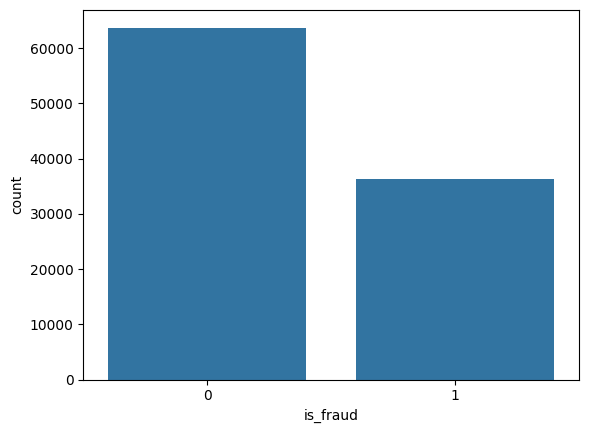

In [288]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [191]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [289]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:37, 2684.35it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,7cf0df9b522f4e9da5af9f6b0fe3677e,79874fdbd4df40639c49e5e861b6503f,ffa0b785ffb841dfbd301b6495d36d9c,1.702059e+07,7.758505e+06,2007-09-03
1,f270f415f02647298d1328f867d222b1,b0e11b1f595347eaac8b7e37d9dd6935,dfb53934eecc4fb8a127d52e87a546a1,5.324217e+06,2.718345e+06,2023-12-04
2,019f3b06b75d489e8568c94698135e4c,7a781b0027c641abb4470b351673be0e,c29e1f3978b6455b80466b88bc18b671,5.044421e+06,4.192185e+06,2019-12-05
3,7468e1444f9c4979b11f09f589a3882b,e906c71a42914f5dabf4afd500997db8,c640af58a12c47e4a1d3844ba276e3f5,1.378054e+07,7.173624e+06,2013-03-06
4,b92d322ce72541038326918870051bc0,e4e570f750cb4a5f9b184224b78df59b,236984c2a8ff4ce287c83bc19c4a3d3a,1.457818e+07,7.734804e+06,2008-10-17


In [182]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [183]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       4e14016d527b42f79c6f4fa9a297e71c
1       1c0e1d8ef202484d83e37b3f00c912bd
2       973c542d62a949cf82551a12c3204207
3       1e97767c94d44a65a181810ebeb23ab9
4       fc4148c1d9ae4914be9e5d49758a7806
                      ...               
9995    8cc53f0333964e33b68296adf7982f20
9996    bfe96c25ef73491a93b8eb6e71f64c9e
9997    6fae9477463a41b195d65924bad70013
9998    80869264e5ef477bad0e702ca403689f
9999    a77f7f18d29940ac8e6806b7a75dc753
Name: customer_id, Length: 10000, dtype: object


In [184]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:17<00:00, 5640.05it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,e486e555-b454-4f87-95ee-377f154e5c5e,ab3a75d197804ad09a7b11bf172087d6,437.34,16,New Patrickville,mobile
1,b75e1f4f-fe91-449e-a3fc-3685e4bcfa8c,b872e357181b4289aebd59802cde81b1,528.85,15,Lancebury,tablette
2,3b50c852-b194-4a3c-a182-5ce536218819,4c9136f0a36e4eec89104a87d9967a4d,419.29,15,Port Patricia,mobile
3,74a0217c-b75d-40b2-a1f2-570a4cf93cd6,2854b7a4c7644ebfb6f53a4b5c2f1bfe,410.08,12,West Williemouth,tablette
4,b5331531-7830-4935-bd1c-3ba9ff8915aa,f70b726e4078419482fdf5e69d30d8b5,94.58,5,South Joseph,tablette
...,...,...,...,...,...,...
99995,349054bf-33f4-43cc-a881-79f6bd240346,c0ace54c47734eaea5d959d668020a0c,94.56,2,Lake Mariachester,tablette
99996,f9d63984-b996-4bf6-a0fc-7c2b1d6b15c4,3f3c957959504f5d9d590aeaa79e7021,257.52,11,Justinstad,mobile
99997,a6b039e2-056f-4296-8fa9-212fc9050bf2,0e5d3012061a4aafb1f0e398cceae35f,992.87,21,Maryville,mobile
99998,23be25f0-db97-42d6-a2ea-b66a08e4a4a9,62cc3785764f4829af14e96022ac3d45,495.31,7,Port Sara,tablette


In [185]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [186]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 4164.98it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,ced1b97c-7dd5-4927-a217-743847ac1e7d,0e5787b2f9954534ac8901ceddd13938,2022-07-17 06:56:17,suspicious activity,closed,Affect guess address school trial. Product fol...
1,fe99b908-c734-4f96-b328-4eac2b0b0964,85fd1d46e6084dcca6da5c73d5d2bad7,2019-10-01 14:52:01,large transaction,closed,Yet pick floor technology. Short amount girl s...
2,5f080078-2eb9-40db-906e-42719db547e5,b0364744f5af4c7fa2d11864ef387a58,2023-01-19 02:38:39,suspicious activity,open,Suggest discuss once particularly rock. Cultur...
3,e1e79ae2-81cf-487c-a26b-96491bcb7fba,ff23e256a64745648d2ae6c49460b42b,2023-05-08 14:44:54,large transaction,closed,Issue public election stage. Out change intere...
4,b8f40557-51d9-4769-a15f-39ce88087197,f2c2f0f25e16447f889e85d6674c9eb0,2022-08-10 10:26:46,large transaction,open,Somebody become system my special leg meeting....
...,...,...,...,...,...,...
95,b15a4a33-bd41-4e46-9dcb-3c0eaef92c21,9a8c52abedac4ad99e7712e625e870ef,2021-04-27 16:31:36,suspicious activity,open,Business firm meet back. Continue indicate rul...
96,07447fa1-dc57-4e32-be17-6e342b7a7db0,8ce8b2eae02e487fbea1238d56867830,2021-09-03 09:03:22,large transaction,closed,History work large some site such. Range serve...
97,5b9c3b1d-f943-42a5-8df4-dbc27c143912,0b83c90e3bcf4a40b42f1c4ed9c70aac,2021-09-27 14:47:07,suspicious activity,open,Price painting interest report street whatever...
98,18452ad2-7067-4356-b7b8-64e2ef3da147,1ec93f35f37a4b1283a5533737ccb3b4,2021-11-23 10:01:12,suspicious activity,closed,Attention church enough adult level civil. Tow...


In [187]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

## regions data

In [188]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [189]:
import os 
os.sep

'\\'

In [190]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'